# HR Analytics at ScaleneWorks 
## – Behavioural Modelling to Predict Renege


#### Project Submission by 

1. Rakesh Peesapati
2. Vijay Rengaraju
3. Lionel Riche 


### Project Background
ScaleneWorks People Solutions LLP (ScaleneWorks), is a Bangalore-based talent management company, which commenced its operations in the summer of 2010. ScaleneWorks considered itself to be the first organization to bring together expertise in technology consulting and talent acquisition. ScaleneWorks not only advised its customers on the talent acquisition practices, but also recommended and implemented individually tailored, viable solutions using analytics.

ScaleneWorks wondered if Analytics could possibly help in identifying the key drivers that influence a candidate in either joining/not-joining a company after accepting the offer, as it would largely help clients save both cost and time.


### Objective
Answers for the following questions would help ScaleneWorks to take appropriate action
1.	What are the key drivers that influence the candidate joining / not-joining a company? 
2.	What rules can be used to predict the renege (Candidates accepting the job offer and not joining)? 
3.	 Devising a predictive algorithm to calculate the probability of acceptance of an offer and joining the company after offer acceptance state.  


### Methodology

1.	Importing all the data
2.	Splitting data to Train and Test data 
3.	Preparing Features and Target
        - Replacing negative values with 0
        - Replacing nan values with the column mean
        - Creating Dummy columns for the Categorical Features
4.  Using SMOTE to Over-sample the data to make both classes of the target equal.
5.  Running Logistic Regression with all the features and checking Accuracy, Precision, Recall, F1-Score and ROC
6.  Selecting features from ExtraTreesClassifier based on their importance
7.  Running Logistic Regression with the subset of features from the previous step and checking Accuracy, Precision, Recall, F1-Score and ROC
8.  Repeating step 7 multiple times by removing one feature at a time till there is no significant reduction in Accuracy, Precision, Recall, F1-Score and ROC


#### Exploratory analysis of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

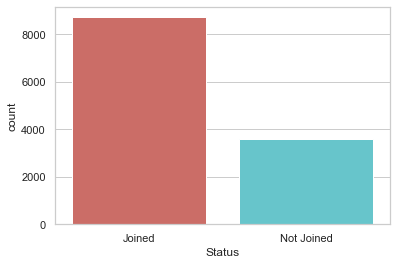

In [2]:
df = pd.read_excel("HRA.xlsx", sheet_name="Data")

sns.countplot(x='Status',data=df, palette='hls')
plt.show()

### Our classes are imbalanced. Therefore, we need to over-sample our data to balance the classes in order to prevent any bias in the model. 

SMOTE (Synthetic Minority Oversampling Technique) is used to balance the classes.
1. SMOTE works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

Text(0, 0.5, 'Proportion of Joiners')

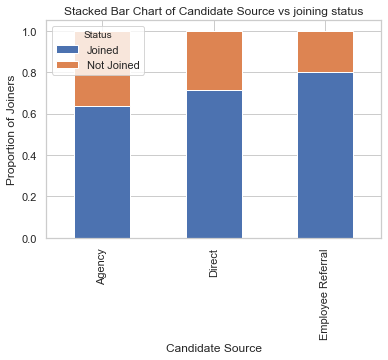

In [3]:
table=pd.crosstab(df['Candidate Source'],df['Status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Candidate Source vs joining status')
plt.xlabel('Candidate Source')
plt.ylabel('Proportion of Joiners')

The Candidate Source may or may not be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Joiners')

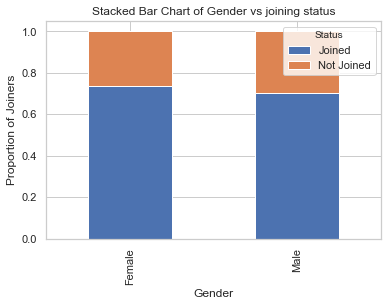

In [4]:
table=pd.crosstab(df['Gender'],df['Status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs joining status')
plt.xlabel('Gender')
plt.ylabel('Proportion of Joiners')

Gender does not seem to be a strong predictor for the outcome variable.

Text(0, 0.5, 'Proportion of Joiners')

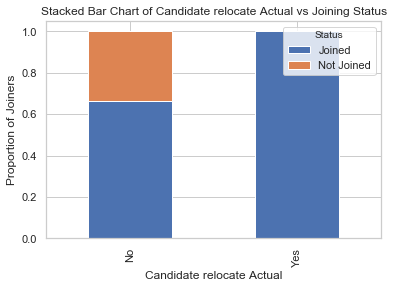

In [5]:
table=pd.crosstab(df['Candidate relocate actual'],df['Status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Candidate relocate Actual vs Joining Status')
plt.xlabel('Candidate relocate Actual')
plt.ylabel('Proportion of Joiners')

Surprisingly, all the candidates who had to relocate, accepted the offer!

Text(0, 0.5, 'Proportion of Joiners')

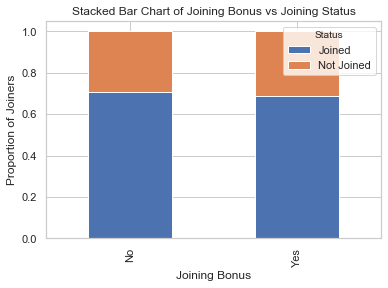

In [6]:
table=pd.crosstab(df['Joining Bonus'],df['Status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Joining Bonus vs Joining Status')
plt.xlabel('Joining Bonus')
plt.ylabel('Proportion of Joiners')

Joining Bonus does not seem to be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

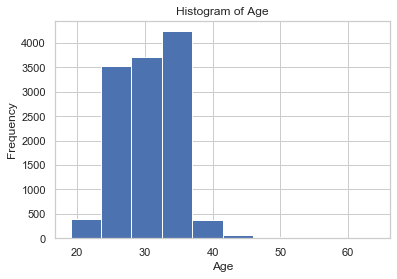

In [7]:
df['Age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Most of the candidates in this dataset are in the age range of 25-35.

Text(0, 0.5, 'Proportion of Joiners')

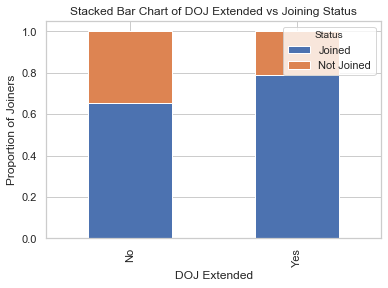

In [8]:
table=pd.crosstab(df['DOJ Extended'],df['Status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of DOJ Extended vs Joining Status')
plt.xlabel('DOJ Extended')
plt.ylabel('Proportion of Joiners')

DOJ Extended may or may not be a good predictor of the outcome variable.

### Analysis

####  Importing Libs

In [9]:
import pandas as pd
import numpy as np
import copy
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding cla

#### Functions

In [10]:
#Load data and split into X and y

def load_dataset(filename, sheetname, target):
    # load the dataset as a pandas DataFrame
    data = pd.read_excel(filename, sheet_name=sheetname)
    # retrieve numpy array
    # split into input (X) and output (y) variables
    X = y = data.copy()
    X = X.loc[:, X.columns != target]
    y = y[target]
    # format all fields as string
    for i in X.columns:
        if X[i].dtypes == 'object':
            X[i] = X[i].astype('category')
    if y.dtypes == 'object':
            y = y.astype('category')
    return X, y

#### Preparing Features and Target

In [11]:
def prepare_features_and_target(X, y, target):   
    # Separate all the categorical columns as a new df
    cat_df = X.select_dtypes(include=['category']).copy()
        
    # Separate the target column as a df and change dtype to category for memory optimization
    df_y_lab = y
    # Replace Not Joined as 0 and Joined as 1
    #tar_labels = df_y_lab.cat.categories.tolist()
    #replace_map_target = {target : {k: v for k,v in zip(tar_labels,[1, 0])}}
    #df_y = df_y_lab.replace(replace_map_target)
    df_y = y.copy()
    df_y.replace("Joined", 1, inplace = True)
    df_y.replace("Not Joined", 0, inplace = True)
    df_y = df_y.astype('int64')
    
    
    # Change dtype to category for memory optimization
    cat_df_opt = opt_memory(cat_df, 'category')
    
    #Replacing binary labels of features with 0 and 1
    labels = cat_df_opt['DOJ Extended'].cat.categories.tolist()
    labels1 = cat_df_opt['Gender'].cat.categories.tolist()
    replace_map_comp1 = {'DOJ Extended' : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
    replace_map_comp2 = {'Joining Bonus' : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
    replace_map_comp3 = {'Candidate relocate actual' : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
    replace_map_comp4 = {'Gender' : {k: v for k,v in zip(labels1,list(range(0,len(labels))))}}    
    cat_df_rep = cat_df_opt.copy()
    cat_df_rep.replace(replace_map_comp1, inplace=True)
    cat_df_rep.replace(replace_map_comp2, inplace=True)
    cat_df_rep.replace(replace_map_comp3, inplace=True)
    cat_df_rep.replace(replace_map_comp4, inplace=True)
    
 
    # Separate non-categorical features as a new df
    rest_df = X.copy()
    for col in cat_df.columns:
        rest_df.drop(columns=col, inplace=True)
    
    # Replace -ve values with 0; and NaN with the mean of the particular column
    cols_with_na_0 = ['Duration to accept offer', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC']
    rest_df_fil = rest_df.copy()
    for col in cols_with_na_0:
        rest_df_fil[col] = np.where(rest_df_fil[col] < 0, 0, rest_df_fil[col])
        rest_df_fil[col] = rest_df_fil[col].replace(np.nan, rest_df_fil[col].mean())
    
    #Removing Candidate Ref Column
    rest_df_final = rest_df_fil.drop(columns='Candidate Ref')
    
    df_final = pd.concat([rest_df_final, cat_df_rep, df_y], axis=1)    
    data_final1 = df_final.copy()

    #Creating dummy variables for the Categorical variables
    cat_vars=['Offered band', 'Candidate Source', 'LOB', 'Location']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data_final1[var], prefix=var)
        data1=data_final1.join(cat_list)
        data_final1=data1

    data_vars=data_final1.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    
    data_final=data_final1[to_keep]
    
    X = data_final.loc[:, data_final.columns != target].copy()
    y = data_final.loc[:, data_final.columns == target].copy()
    
    return X, y

In [12]:
def opt_memory(input_df, dtype):
    df = input_df.copy()
    for col in df.columns:
        df[col] = df[col].astype('category')
    return df

In [13]:
def over_sample_data(X_train_enc, y_train_enc):
    os = SMOTE(random_state=1)
    columns = X_train_enc.columns
    os_data_X,os_data_y=os.fit_sample(X_train_enc, y_train_enc)
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
    os_data_y= pd.DataFrame(data=os_data_y,columns=['Status'])
    
    return os_data_X, os_data_y

In [14]:
def get_Model_Stats(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    logreg = LogisticRegression(solver = 'lbfgs', max_iter=2000)
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

#### 5. Running Logistic Regression with all the features

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
D:\Anaco

Accuracy of logistic regression classifier on test set: 0.71
[[1741  469]
 [ 797 1413]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.73      2210
           1       0.75      0.64      0.69      2210

    accuracy                           0.71      4420
   macro avg       0.72      0.71      0.71      4420
weighted avg       0.72      0.71      0.71      4420



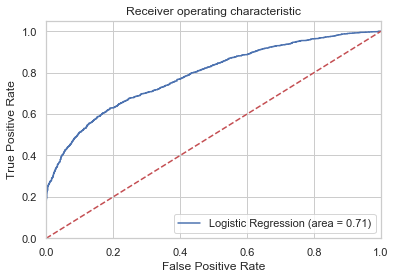

In [15]:
# load the dataset
target = "Status"
X, y = load_dataset("HRA.xlsx", "Data", target)

# 2. split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# prepare training data
X_train_enc, y_train_enc = prepare_features_and_target(X_train, y_train, target)

# prepare testing data
X_test_enc, y_test_enc = prepare_features_and_target(X_test, y_test, target)

#over sampling the data as the target classes are not balanced.
os_data_train_X, os_data_train_y = over_sample_data(X_train_enc, y_train_enc)
#over sampling the data as the target classes are not balanced.
os_data_test_X, os_data_test_y = over_sample_data(X_test_enc, y_test_enc)

#fit logistic regression model with all the features and check stats
get_Model_Stats(os_data_train_X, os_data_test_X, os_data_train_y, os_data_test_y)

#### Feature Importance
Using Extra Trees Classifier to compute the relative importance of each attribute. These importance values are then used to inform a feature selection process.

In [16]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(os_data_train_X, os_data_train_y)
# display the relative importance of each attribute
print(model.feature_importances_)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[1.09910910e-01 6.37903214e-02 6.73550659e-02 6.59969624e-02
 3.76671509e-02 5.06456916e-02 5.62988950e-02 6.62318182e-02
 8.52251044e-03 8.50118828e-02 2.35426896e-02 7.18722784e-03
 2.06295554e-02 1.88362798e-02 4.58319951e-03 1.68276455e-03
 5.90329856e-04 1.09708555e-04 2.48200885e-02 2.82114995e-02
 2.27713835e-02 6.54946608e-03 2.01529433e-02 1.10611850e-02
 3.75496618e-03 7.96988679e-03 6.93107057e-03 2.74084526e-02
 1.16604411e-02 2.91674521e-03 3.56648363e-02 5.10975441e-04
 1.40006321e-03 1.86229747e-04 2.49023879e-02 2.81294861e-02
 1.32597150e-04 1.00669656e-03 3.08735712e-03 5.87414912e-03
 2.33937085e-03 3.17938130e-03 2.92609249e-02 1.63375856e-04
 1.36107654e-03]


#### Features got from Extra Trees Classifier

1. 'Duration to accept offer'
2. 'Notice period'
3. 'Pecent hike expected in CTC'
4. 'Percent hike offered in CTC'
5. 'Rex in Yrs'
6. 'Age'
7. 'DOJ Extended'
8. 'Candidate relocate actual'

#### 7. Running Logistic Regression with the subset of features

Accuracy of logistic regression classifier on test set: 0.68
[[1702  508]
 [ 897 1313]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      2210
           1       0.72      0.59      0.65      2210

    accuracy                           0.68      4420
   macro avg       0.69      0.68      0.68      4420
weighted avg       0.69      0.68      0.68      4420



D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


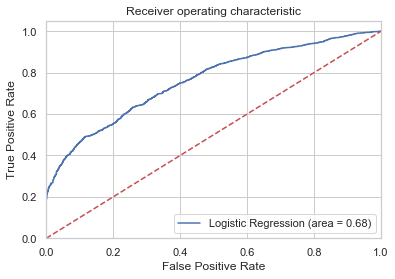

In [17]:
#fit logistic regression model with the features got from ETC

feature_list_from_ETC = ['Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Rex in Yrs', 'Age', 'DOJ Extended', 'Candidate relocate actual']
get_Model_Stats(os_data_train_X.loc[:, feature_list_from_ETC], os_data_test_X.loc[:, feature_list_from_ETC], os_data_train_y, os_data_test_y)

##### Remove AGE

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.67
[[1694  516]
 [ 933 1277]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      2210
           1       0.71      0.58      0.64      2210

    accuracy                           0.67      4420
   macro avg       0.68      0.67      0.67      4420
weighted avg       0.68      0.67      0.67      4420



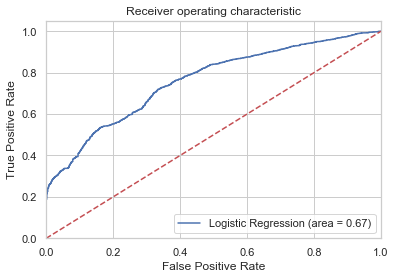

In [18]:
#fit logistic regression model with the features got from ETC
#Remove AGE


feature_list_from_ETC = ['Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Rex in Yrs', 'DOJ Extended', 'Candidate relocate actual']
get_Model_Stats(os_data_train_X.loc[:, feature_list_from_ETC], os_data_test_X.loc[:, feature_list_from_ETC], os_data_train_y, os_data_test_y)

##### Remove 'Pecent hike expected in CTC' and 'Percent hike offered in CTC'

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.67
[[1702  508]
 [ 961 1249]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      2210
           1       0.71      0.57      0.63      2210

    accuracy                           0.67      4420
   macro avg       0.67      0.67      0.66      4420
weighted avg       0.67      0.67      0.66      4420



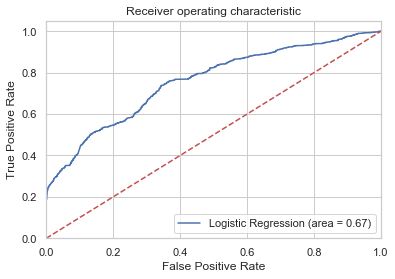

In [19]:
#fit logistic regression model with the features got from ETC
#Remove 'Pecent hike expected in CTC', 'Percent hike offered in CTC'


feature_list_from_ETC = ['Duration to accept offer', 'Notice period',  'Rex in Yrs', 'DOJ Extended', 'Candidate relocate actual']
get_Model_Stats(os_data_train_X.loc[:, feature_list_from_ETC], os_data_test_X.loc[:, feature_list_from_ETC], os_data_train_y, os_data_test_y)

##### Remove 'Rex in Yrs'

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.67
[[1717  493]
 [ 951 1259]]
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      2210
           1       0.72      0.57      0.64      2210

    accuracy                           0.67      4420
   macro avg       0.68      0.67      0.67      4420
weighted avg       0.68      0.67      0.67      4420



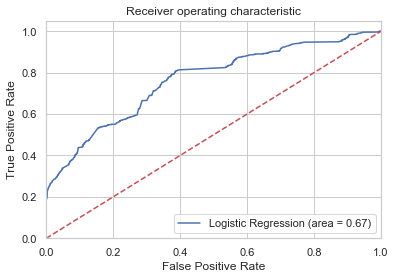

In [20]:
#fit logistic regression model with the features got from ETC
#Remove 'Rex in Yrs', 


feature_list_from_ETC = ['Duration to accept offer', 'Notice period',  'DOJ Extended', 'Candidate relocate actual']
get_Model_Stats(os_data_train_X.loc[:, feature_list_from_ETC], os_data_test_X.loc[:, feature_list_from_ETC], os_data_train_y, os_data_test_y)

##### Remove 'DOJ Extended'

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.66
[[1183 1027]
 [ 485 1725]]
              precision    recall  f1-score   support

           0       0.71      0.54      0.61      2210
           1       0.63      0.78      0.70      2210

    accuracy                           0.66      4420
   macro avg       0.67      0.66      0.65      4420
weighted avg       0.67      0.66      0.65      4420



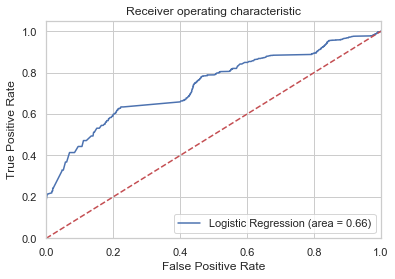

In [21]:
#fit logistic regression model with the features got from ETC
#Remove 'DOJ Extended', 


feature_list_from_ETC = ['Duration to accept offer', 'Notice period',  'Candidate relocate actual']
get_Model_Stats(os_data_train_X.loc[:, feature_list_from_ETC], os_data_test_X.loc[:, feature_list_from_ETC], os_data_train_y, os_data_test_y)

##### Removing 'DOJ Extended' causes the model to perform badly.
Final set of features used in the model are 
1. 'Duration to accept offer'
2. 'Notice period'
3. 'DOJ Extended'
4. 'Candidate relocate actual'

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.67
[[1717  493]
 [ 951 1259]]
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      2210
           1       0.72      0.57      0.64      2210

    accuracy                           0.67      4420
   macro avg       0.68      0.67      0.67      4420
weighted avg       0.68      0.67      0.67      4420



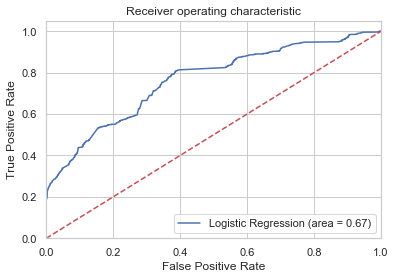

In [22]:
final_feature_list = ['Duration to accept offer', 'Notice period',  'DOJ Extended', 'Candidate relocate actual']
get_Model_Stats(os_data_train_X.loc[:, final_feature_list], os_data_test_X.loc[:, final_feature_list], os_data_train_y, os_data_test_y)

### Summary

1. The key drivers that influence the candidate joining / not-joining a company are
    1. 'Duration to accept offer'
    2. 'Notice period'
    3. 'DOJ Extended'
    4. 'Candidate relocate actual'
2.	What rules can be used to predict the renege (Candidates accepting the job offer and not joining)? 
    - Probability  of  joining = 
    1 / (1 + exp(-(-5.62959903e-03.Duration to accept offer -2.36198276e-02.Notice period + 9.59397522e-01.DOJ Extended + 5.63014104e+00.Candidate relocate actual)))
    
    - Probability of NOT joining = 1 - Probability of joining

Renege(Candidates accepting the job offer and not joining) can be predicted this way.

 
